In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


iris = load_iris()
X = iris.data[:, [2, 3]]  
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [119]:
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [120]:
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"KNN (k={k}) test accuracy: {acc:.4f}")

KNN (k=5) test accuracy: 0.9474


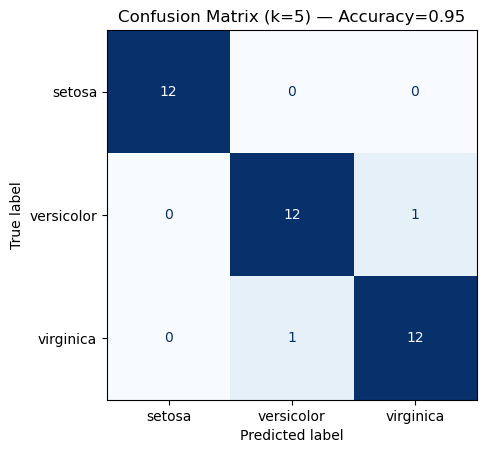

In [121]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title(f"Confusion Matrix (k={k}) — Accuracy={acc:.2f}")
plt.show()

In [122]:
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])
markers = ['o', 's', '^']

In [123]:
X_all_scaled = np.vstack((X_train_scaled, X_test_scaled))
x_min, x_max = X_all_scaled[:, 0].min() - 0.5, X_all_scaled[:, 0].max() + 0.5
y_min, y_max = X_all_scaled[:, 1].min() - 0.5, X_all_scaled[:, 1].max() + 0.5

C:\Users\Parayan\AppData\Local\Temp\ipykernel_39784\4120793626.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[misclassified, 0],


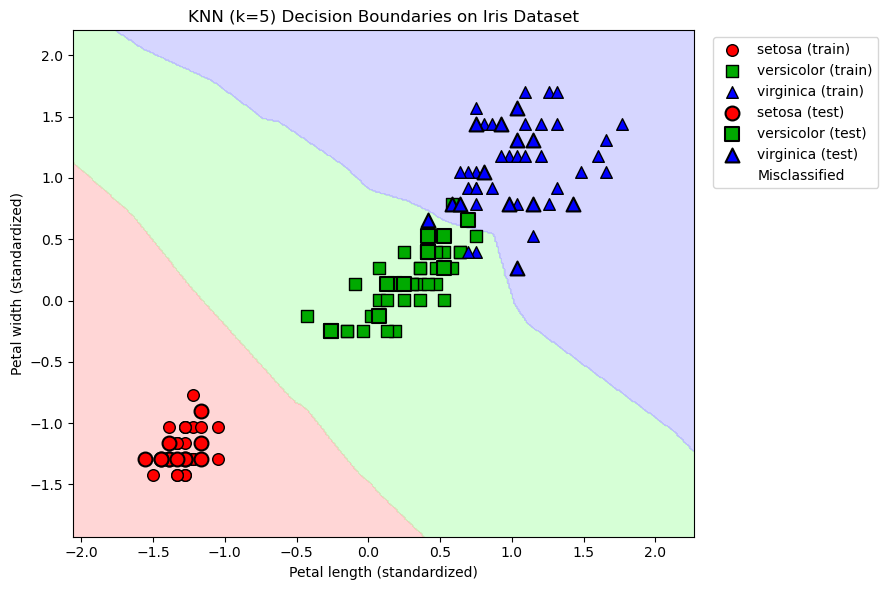

In [131]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

for idx, class_name in enumerate(iris.target_names):
    plt.scatter(X_train_scaled[y_train == idx, 0],
                X_train_scaled[y_train == idx, 1],
                c=[cmap_bold(idx)],
                marker=markers[idx],
                edgecolor='k',
                s=70,
                label=f"{class_name} (train)")

for idx, class_name in enumerate(iris.target_names):
    plt.scatter(X_test_scaled[y_test == idx, 0],
                X_test_scaled[y_test == idx, 1],
                c=[cmap_bold(idx)],
                marker=markers[idx],
                edgecolor='black',
                linewidth=1.5,
                s=100,
                label=f"{class_name} (test)")

misclassified = np.where(y_test != y_pred)[0]
if len(misclassified) > 0:
    plt.scatter(X_test_scaled[misclassified, 0],
                X_test_scaled[misclassified, 1],
                facecolors='none',
                edgecolors='black',
                marker='x',
                s=200,
                linewidth=2,
                label='Misclassified')

plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.title(f"KNN (k={k}) Decision Boundaries on Iris Dataset")
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()